In [10]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

font_location = 'C:/Windows/Fonts/malgunsl.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
sns.set(rc = {'figure.figsize':(15,8)})
matplotlib.rc('font' , family=font_name)#한글폰트 설정

In [11]:
# 데이터 불러오기
df = pd.read_excel('자동차항만입출항전처리데이터.xlsx', index_col=0)
df

,선명,호출부호,입항횟수,입출,총톤수,계선,계선장소,입출항 차 (시간),차항지,전출항지,입항일시,출항일시,MRN 번호
0,TITANIA,9HA2272,1,0,74255,MBJ 02,MBJ,116.000000,목포,장승포,2011-12-28 17:15:00,2012-01-02 13:15:00,12EUKOV0179
1,WESTERN HIGHWAY,3EJK5,1,0,39422,MBJ 02,MBJ,107.583333,SINGAPORE,"KANDA, FUKUOKA",2011-12-29 05:45:00,2012-01-02 17:20:00,12EVOLU0039
2,NORTHERN HIGHWAY,V7FT4,1,1,39422,MBJ 01,MBJ,38.000000,NEW WESTMINSTER,광양,2012-01-02 07:35:00,2012-01-03 21:35:00,11GLVSU1985
3,NORTHERN HIGHWAY,V7FT4,1,0,39422,MBJ 03,MBJ,38.000000,NEW WESTMINSTER,광양,2012-01-02 07:35:00,2012-01-03 21:35:00,12GLVSU0026
4,CAR STAR,A8VI6,1,0,43790,MBJ 03,MBJ,7.750000,YOKOHAMA,"NAGOYA, AICHI",2012-01-02 07:45:00,2012-01-02 15:30:00,12ZIMUECS10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11428,PRESTIGE ACE,H3NG,2,1,55878,MBJ 01,MBJ,15.750000,광양,SINGAPORE,2021-08-16 06:15:00,2021-08-16 22:00:00,21GLVSE147I
11429,PASSAMA,ZDNC6,2,1,47053,MBJ 03,MBJ,73.000000,MOJI/KITAKYUSHU,마산,2021-08-16 08:00:00,2021-08-19 09:00:00,21L53KI448I
11430,아세안 메저스티호,DSMZ8,2,1,71383,MBJ 02,MBJ,39.750000,평택.당진,마산,2021-08-17 06:15:00,2021-08-18 22:00:00,21EUKOV913I
11431,MORNING LILY,3FDI5,2,1,70853,MBJ 03,MBJ,15.750000,마산,평택.당진,2021-08-18 06:15:00,2021-08-18 22:00:00,21EUKOV921I


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11433 entries, 0 to 11432
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   선명          11433 non-null  object        
 1   호출부호        11433 non-null  object        
 2   입항횟수        11433 non-null  int64         
 3   입출          11433 non-null  int64         
 4   총톤수         11433 non-null  int64         
 5   계선          11433 non-null  object        
 6   계선장소        11433 non-null  object        
 7   입출항 차 (시간)  11433 non-null  float64       
 8   차항지         11431 non-null  object        
 9   전출항지        11431 non-null  object        
 10  입항일시        11433 non-null  datetime64[ns]
 11  출항일시        11433 non-null  datetime64[ns]
 12  MRN 번호      11431 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(7)
memory usage: 1.2+ MB


In [13]:
df.isnull().sum()

선명            0
호출부호          0
입항횟수          0
입출            0
총톤수           0
계선            0
계선장소          0
입출항 차 (시간)    0
차항지           2
전출항지          2
입항일시          0
출항일시          0
MRN 번호        2
dtype: int64

호출부호: \
선명\
입항횟수: 카테고리\
입출: 0, 1\
총톤수\
입항일시\
출항일시

In [14]:
df.describe()

,입항횟수,입출,총톤수,입출항 차 (시간)
count,11433.000000,11433.000000,11433.000000,11433.000000
mean,2.367270,0.500219,55256.161462,29.337657
std,1.642966,0.500022,11678.768105,33.435879
min,1.000000,0.000000,4464.000000,0.300000
25%,1.000000,0.000000,47654.000000,9.050000
50%,2.000000,1.000000,58631.000000,15.166667
75%,3.000000,1.000000,60876.000000,34.416667
max,13.000000,1.000000,76420.000000,382.500000


<AxesSubplot:xlabel='입항횟수', ylabel='count'>

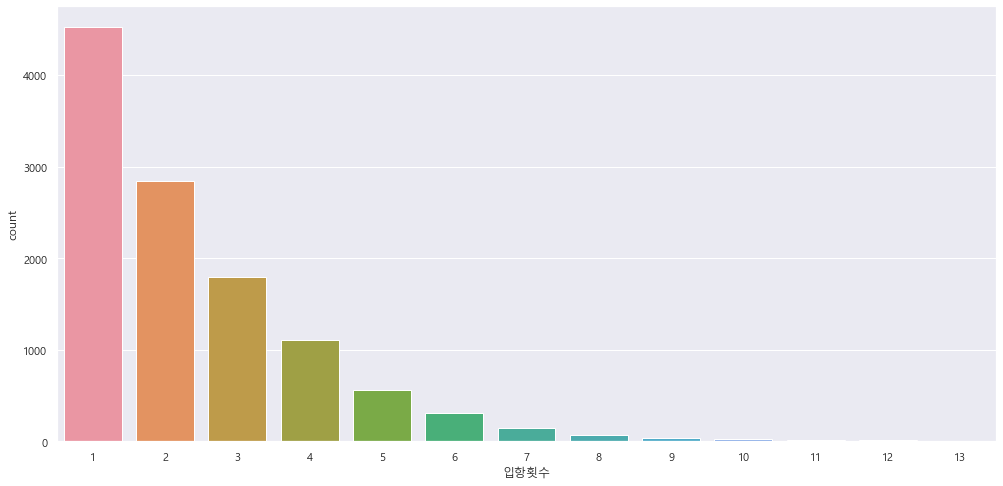

In [15]:
sns.countplot('입항횟수', data=df)

<AxesSubplot:xlabel='count', ylabel='계선'>

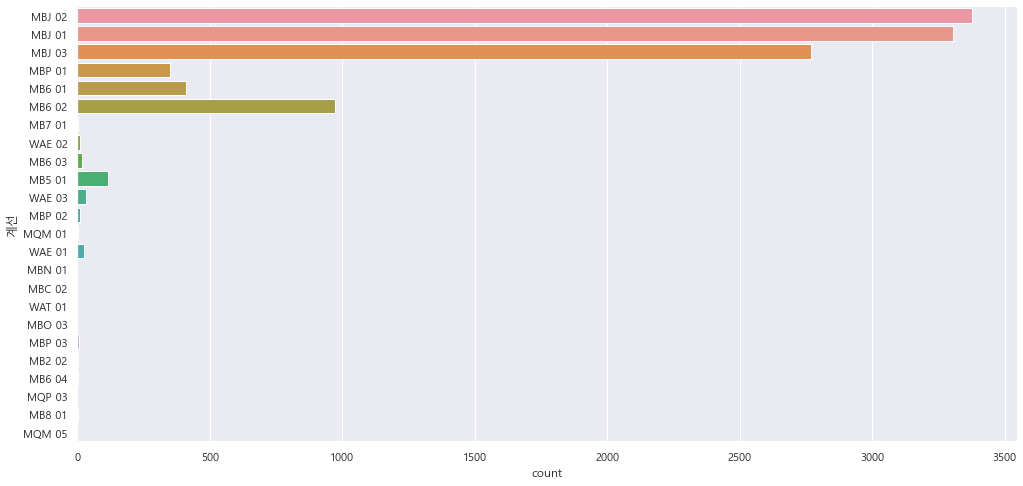

In [16]:
# 계선장소에 너무 쓸데없는 값들이 많이 있다.
sns.countplot(y = df['계선'])

In [18]:
a = pd.DataFrame(df['계선장소'].value_counts())
a

,계선장소
MBJ,9454
MB6,1409
MBP,366
MB5,116
WAE,70
MQM,6
MB8,3
MB2,2
MB7,2
MBN,1


In [19]:
# 총 데이터가 9년반
# 누적 입항횟수가 20 미만 계선장소 행 제거
DelRow = a.query('계선장소 <= 10').index.tolist()
DelRow

# 필요없는 계선장소인 행들의 인덱스 저장 후 drop
loc = []
for i in range(len(df['계선장소'])):
    if df['계선장소'].iloc[i] in DelRow:
        loc.append(i)
df.drop(loc, inplace=True)
df.reset_index(drop=True)

,선명,호출부호,입항횟수,입출,총톤수,계선,계선장소,입출항 차 (시간),차항지,전출항지,입항일시,출항일시,MRN 번호
0,TITANIA,9HA2272,1,0,74255,MBJ 02,MBJ,116.000000,목포,장승포,2011-12-28 17:15:00,2012-01-02 13:15:00,12EUKOV0179
1,WESTERN HIGHWAY,3EJK5,1,0,39422,MBJ 02,MBJ,107.583333,SINGAPORE,"KANDA, FUKUOKA",2011-12-29 05:45:00,2012-01-02 17:20:00,12EVOLU0039
2,NORTHERN HIGHWAY,V7FT4,1,1,39422,MBJ 01,MBJ,38.000000,NEW WESTMINSTER,광양,2012-01-02 07:35:00,2012-01-03 21:35:00,11GLVSU1985
3,NORTHERN HIGHWAY,V7FT4,1,0,39422,MBJ 03,MBJ,38.000000,NEW WESTMINSTER,광양,2012-01-02 07:35:00,2012-01-03 21:35:00,12GLVSU0026
4,CAR STAR,A8VI6,1,0,43790,MBJ 03,MBJ,7.750000,YOKOHAMA,"NAGOYA, AICHI",2012-01-02 07:45:00,2012-01-02 15:30:00,12ZIMUECS10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11410,PRESTIGE ACE,H3NG,2,1,55878,MBJ 01,MBJ,15.750000,광양,SINGAPORE,2021-08-16 06:15:00,2021-08-16 22:00:00,21GLVSE147I
11411,PASSAMA,ZDNC6,2,1,47053,MBJ 03,MBJ,73.000000,MOJI/KITAKYUSHU,마산,2021-08-16 08:00:00,2021-08-19 09:00:00,21L53KI448I
11412,아세안 메저스티호,DSMZ8,2,1,71383,MBJ 02,MBJ,39.750000,평택.당진,마산,2021-08-17 06:15:00,2021-08-18 22:00:00,21EUKOV913I
11413,MORNING LILY,3FDI5,2,1,70853,MBJ 03,MBJ,15.750000,마산,평택.당진,2021-08-18 06:15:00,2021-08-18 22:00:00,21EUKOV921I


<AxesSubplot:xlabel='계선장소', ylabel='count'>

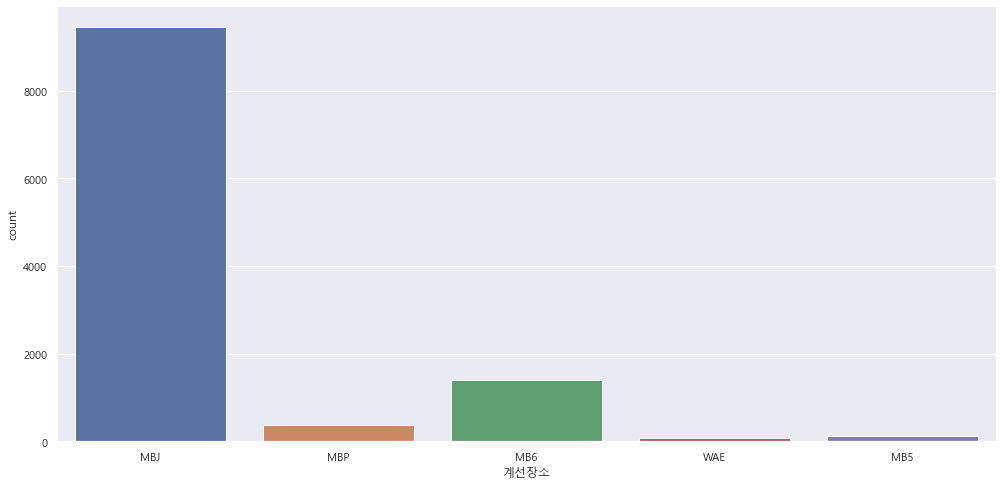

In [20]:
sns.countplot(df['계선장소'])

In [21]:
df.isnull().sum()

선명            0
호출부호          0
입항횟수          0
입출            0
총톤수           0
계선            0
계선장소          0
입출항 차 (시간)    0
차항지           2
전출항지          2
입항일시          0
출항일시          0
MRN 번호        2
dtype: int64

In [22]:
df[df['차항지'].isnull()]

,선명,호출부호,입항횟수,입출,총톤수,계선,계선장소,입출항 차 (시간),차항지,전출항지,입항일시,출항일시,MRN 번호
1716,RCC CLASSIC,C6ZY7,1,0,58767,MBJ 02,MBJ,54.416667,NaN,NaN,2013-01-28 08:10:00,2013-01-30 14:35:00,13EUKOV1511
1717,RCC CLASSIC,C6ZY7,1,1,58767,MBJ 02,MBJ,54.416667,NaN,NaN,2013-01-28 08:10:00,2013-01-30 14:35:00,NaN


In [23]:
df[df['호출부호'] == "C6ZY7"]

,선명,호출부호,입항횟수,입출,총톤수,계선,계선장소,입출항 차 (시간),차항지,전출항지,입항일시,출항일시,MRN 번호
1716,RCC CLASSIC,C6ZY7,1,0,58767,MBJ 02,MBJ,54.416667,NaN,NaN,2013-01-28 08:10:00,2013-01-30 14:35:00,13EUKOV1511
1717,RCC CLASSIC,C6ZY7,1,1,58767,MBJ 02,MBJ,54.416667,NaN,NaN,2013-01-28 08:10:00,2013-01-30 14:35:00,NaN
1764,RCC CLASSIC,C6ZY7,2,0,58767,MBJ 02,MBJ,9.000000,SINGAPORE,평택.당진,2013-02-05 12:10:00,2013-02-05 21:10:00,13EUKOV2170
1765,RCC CLASSIC,C6ZY7,2,1,58767,MBJ 02,MBJ,9.000000,SINGAPORE,평택.당진,2013-02-05 12:10:00,2013-02-05 21:10:00,13EUKOU0412
2302,RCC CLASSIC,C6ZY7,3,0,58767,MBJ 03,MBJ,41.833333,목포,평택.당진,2013-06-11 18:05:00,2013-06-13 11:55:00,13EUKOV8961
2303,RCC CLASSIC,C6ZY7,3,1,58767,MBJ 03,MBJ,41.833333,목포,평택.당진,2013-06-11 18:05:00,2013-06-13 11:55:00,13EUKOU1592
2316,RCC CLASSIC,C6ZY7,4,0,58767,MBJ 01,MBJ,60.083333,SAN JUAN,목포,2013-06-15 08:25:00,2013-06-17 20:30:00,13EUKOV9096
2317,RCC CLASSIC,C6ZY7,4,1,58767,MBJ 02,MBJ,60.083333,SAN JUAN,목포,2013-06-15 08:25:00,2013-06-17 20:30:00,13EUKOU1620
2704,RCC CLASSIC,C6ZY7,5,1,58767,MBJ 01,MBJ,15.100000,SINGAPORE,군산,2013-09-30 07:24:00,2013-09-30 22:30:00,13EUKOW4320
2705,RCC CLASSIC,C6ZY7,5,0,58767,MBJ 01,MBJ,15.100000,SINGAPORE,군산,2013-09-30 07:24:00,2013-09-30 22:30:00,13EUKOW4630


In [53]:
# 결측값 제거
df.dropna(axis=0, inplace=True)
df = df.reset_index(drop=True)
df.isnull().sum()

선명            0
호출부호          0
입항횟수          0
입출            0
총톤수           0
계선            0
계선장소          0
입출항 차 (시간)    0
차항지           0
전출항지          0
입항일시          0
출항일시          0
MRN 번호        0
dtype: int64

In [ ]:
# MRN에서 선사번호 추출
# 3번째자리부터 총 4자리 = [2:6]


In [56]:
df.to_excel(excel_writer='자동차항만입출항전처리데이터.xlsx') #엑셀로 저장

# EDA

# 일변량 데이터 분석

In [42]:
df.describe()

,입항횟수,입출,총톤수,입출항 차 (시간)
count,11412.000000,11412.000000,11412.000000,11412.000000
mean,2.366894,0.500351,55270.192341,29.224423
std,1.640956,0.500022,11651.396817,33.291646
min,1.000000,0.000000,4464.000000,0.300000
25%,1.000000,0.000000,47654.000000,9.029167
50%,2.000000,1.000000,58631.000000,15.100000
75%,3.000000,1.000000,60876.000000,34.333333
max,13.000000,1.000000,76420.000000,382.500000


(array([ 211.,   14.,   16.,  121.,  352., 2136., 1216., 4896., 1425.,
        1025.]),
 array([ 4464. , 11659.6, 18855.2, 26050.8, 33246.4, 40442. , 47637.6,
        54833.2, 62028.8, 69224.4, 76420. ]),
 <BarContainer object of 10 artists>)

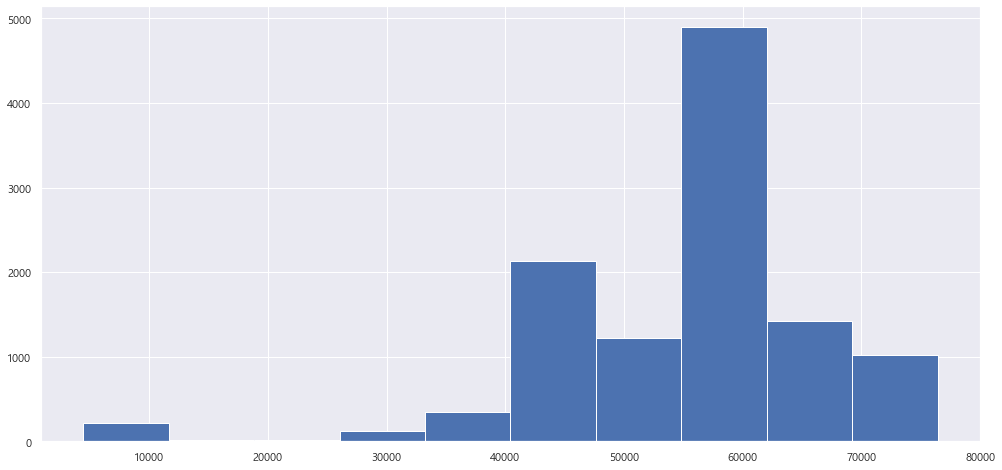

In [26]:
plt.hist(df['총톤수'])
# 만톤인 자동차 운반선은 언제 운항 했던 것인가
# 과거의 자동차 운반선이지 않을까?

(array([9.007e+03, 1.484e+03, 5.420e+02, 2.390e+02, 7.700e+01, 4.300e+01,
        9.000e+00, 7.000e+00, 2.000e+00, 2.000e+00]),
 array([3.0000e-01, 3.8520e+01, 7.6740e+01, 1.1496e+02, 1.5318e+02,
        1.9140e+02, 2.2962e+02, 2.6784e+02, 3.0606e+02, 3.4428e+02,
        3.8250e+02]),
 <BarContainer object of 10 artists>)

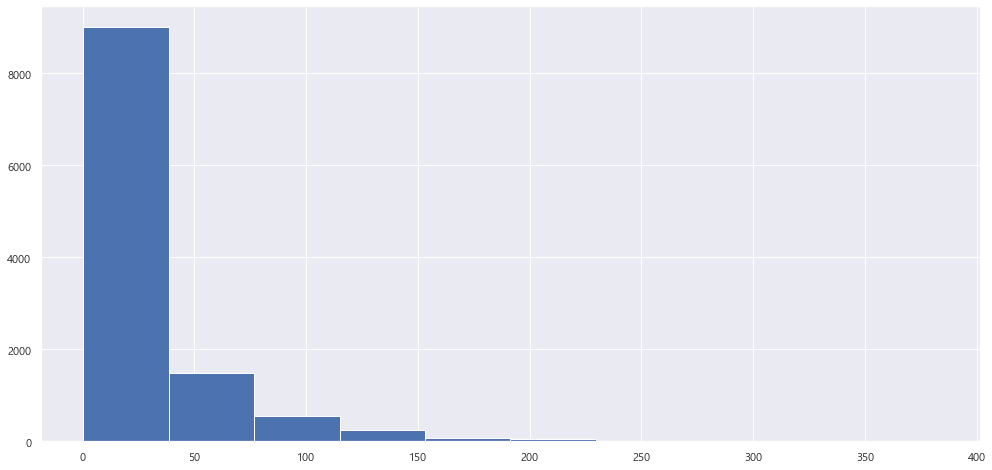

In [27]:
plt.hist(df['입출항 차 (시간)'])

(array([7352., 1795., 1108.,  558.,  305.,  209.,   36.,   22.,   14.,
          13.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

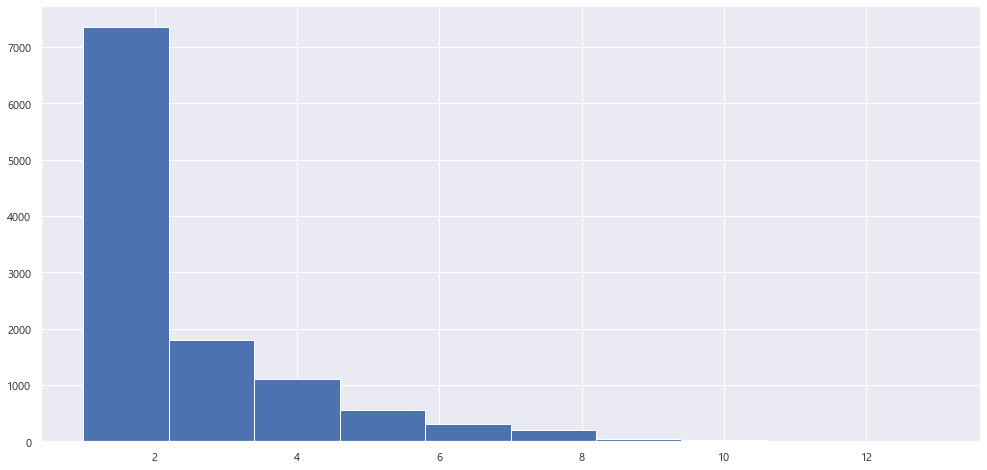

In [46]:
plt.hist(df['입항횟수'])

<AxesSubplot:xlabel='입출', ylabel='count'>

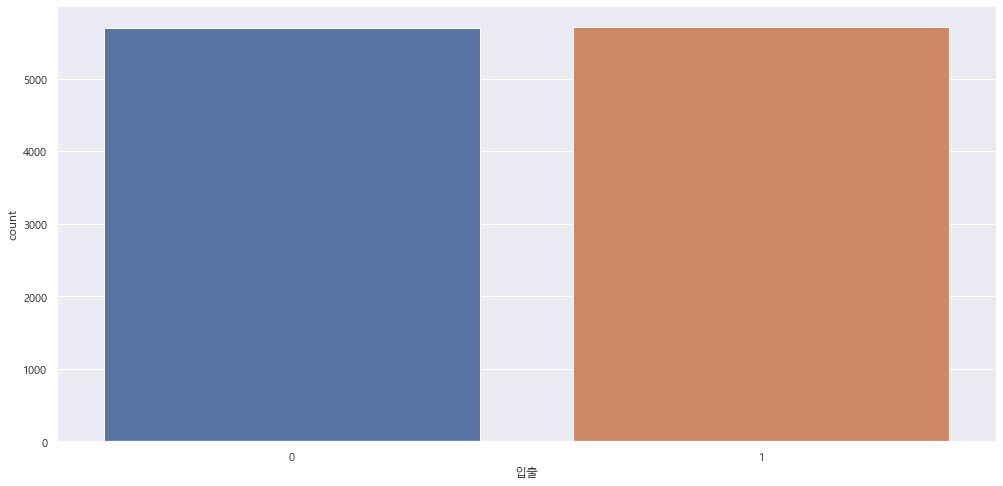

In [29]:
sns.countplot(df['입출'])

<AxesSubplot:xlabel='입출항 차 (시간)'>

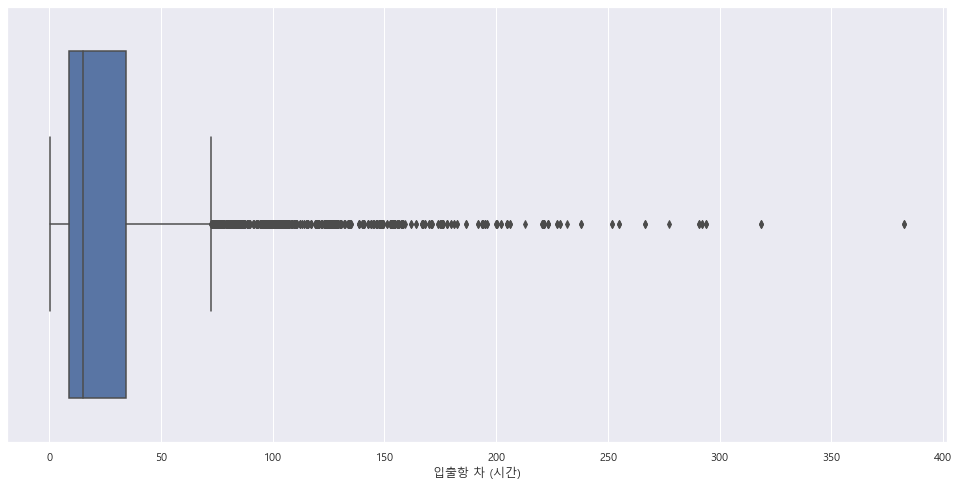

In [30]:
sns.boxplot(data=df, x='입출항 차 (시간)')

<AxesSubplot:xlabel='입항횟수'>

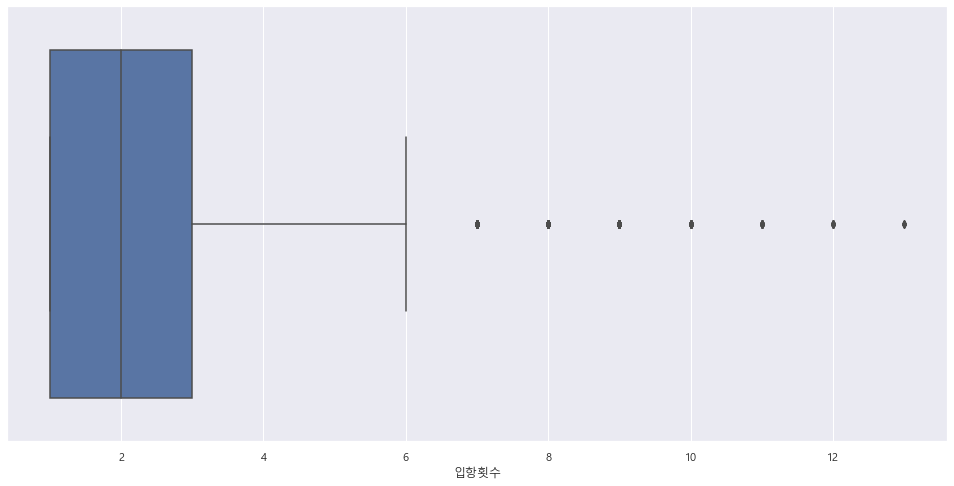

In [47]:
sns.boxplot(data=df, x='입항횟수')

<AxesSubplot:xlabel='총톤수'>

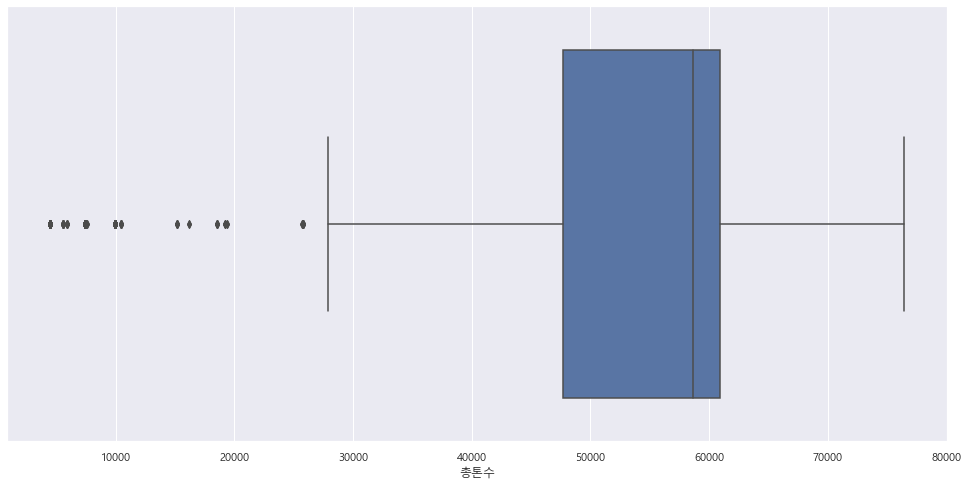

In [39]:
sns.boxplot(df['총톤수'])

# 이변량 데이터 분석

<AxesSubplot:xlabel='계선장소', ylabel='count'>

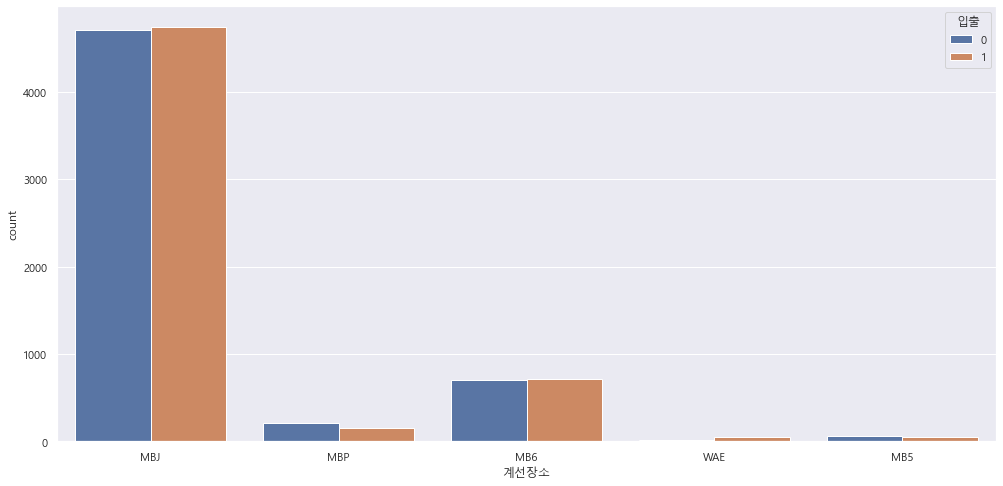

In [31]:
sns.countplot(data=df, x='계선장소', hue='입출')

<AxesSubplot:xlabel='계선장소', ylabel='입출'>

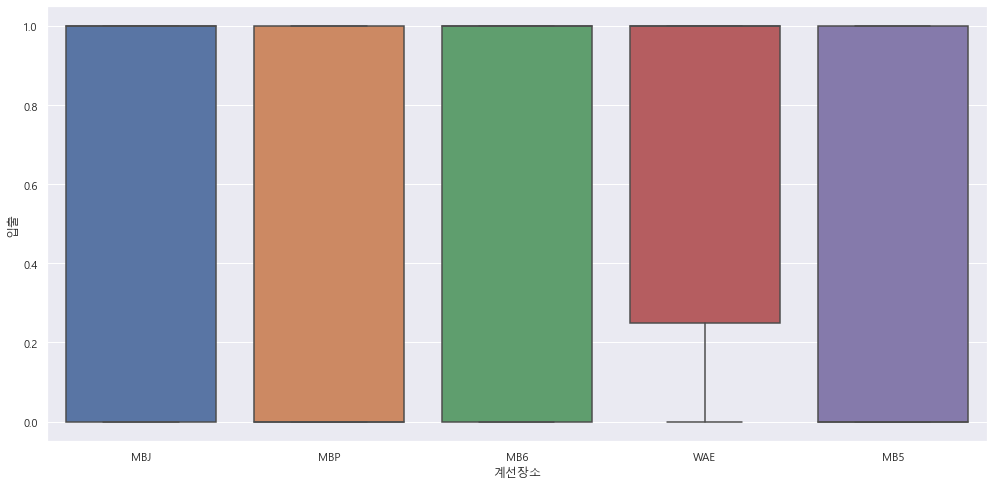

In [32]:
sns.boxplot(data=df, x='계선장소', y='입출')

<AxesSubplot:xlabel='입출항 차 (시간)', ylabel='계선장소'>

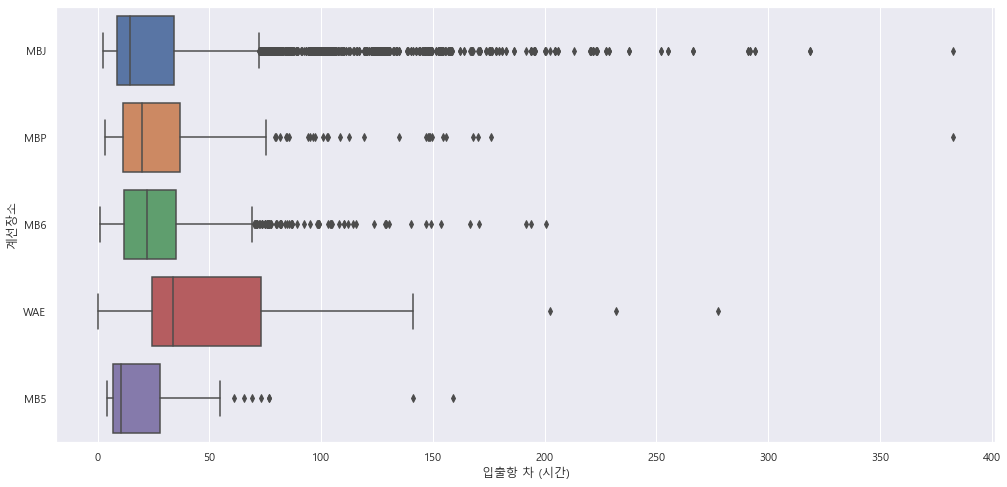

In [33]:
sns.boxplot(data=df, x='입출항 차 (시간)', y='계선장소')

<AxesSubplot:xlabel='총톤수', ylabel='계선장소'>

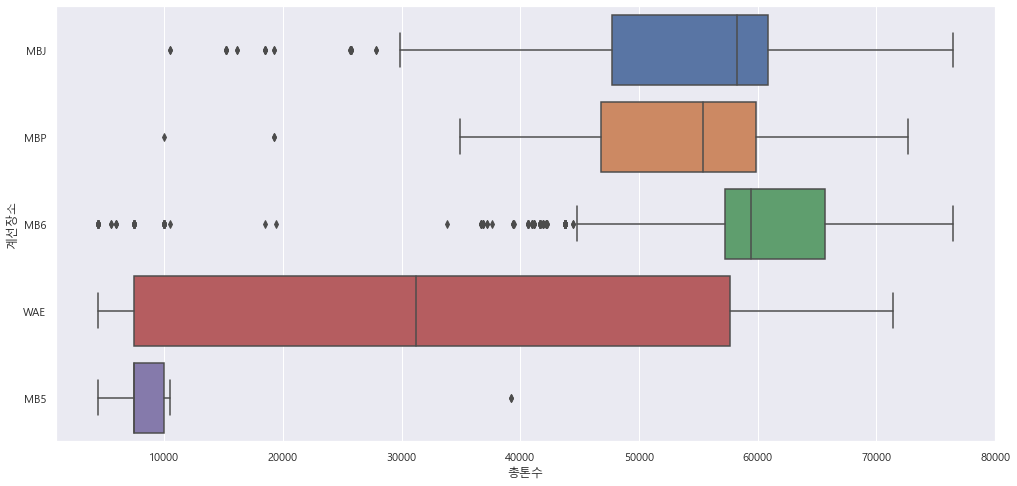

In [51]:
sns.boxplot(data=df, x='총톤수', y='계선장소')

<AxesSubplot:xlabel='총톤수', ylabel='입출항 차 (시간)'>

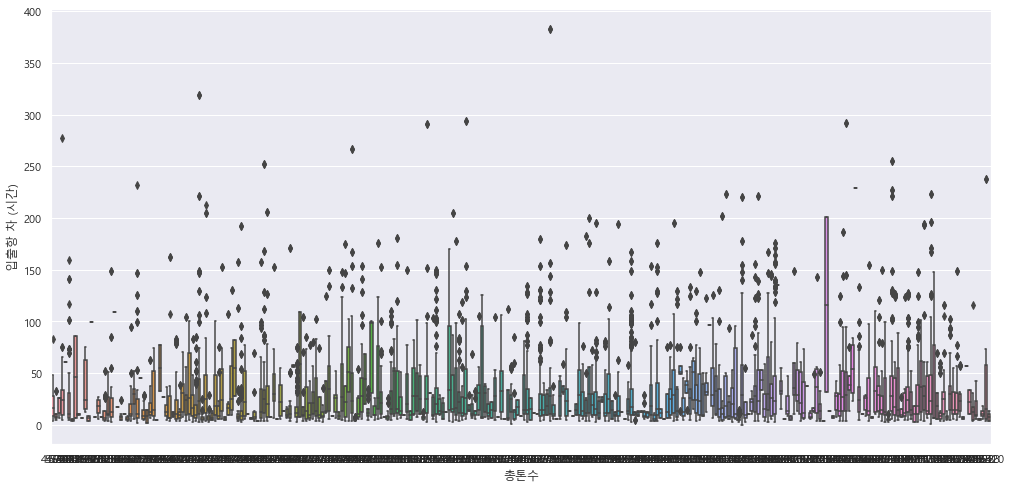

In [52]:
sns.boxplot(data=df, x='총톤수', y='입출항 차 (시간)')

In [34]:
df.groupby('계선장소')['입출항 차 (시간)'].mean()

계선장소
MB5    21.167672
MB6    27.676626
MBJ    29.279985
MBP    31.555616
WAE    54.072619
Name: 입출항 차 (시간), dtype: float64

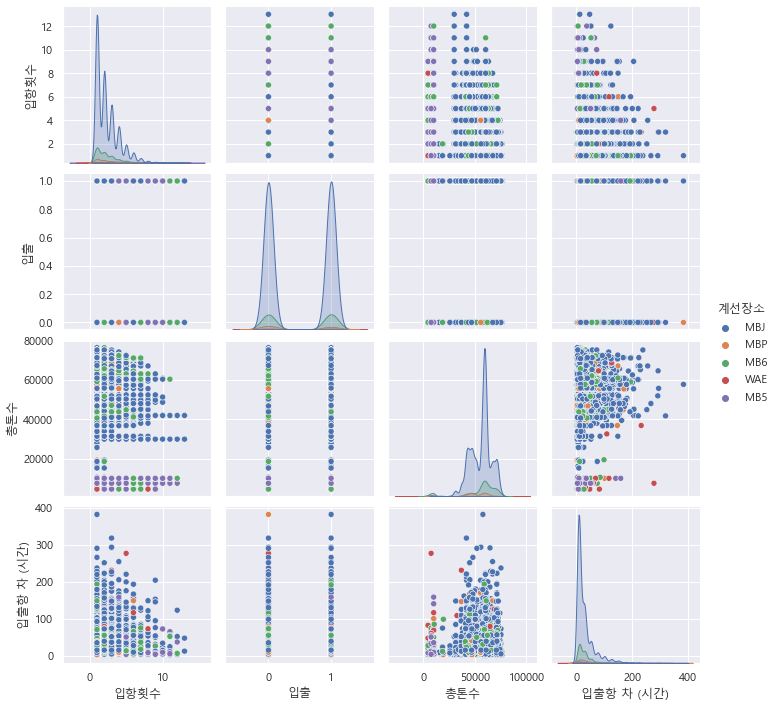

In [35]:
sns.pairplot(df, hue = '계선장소')

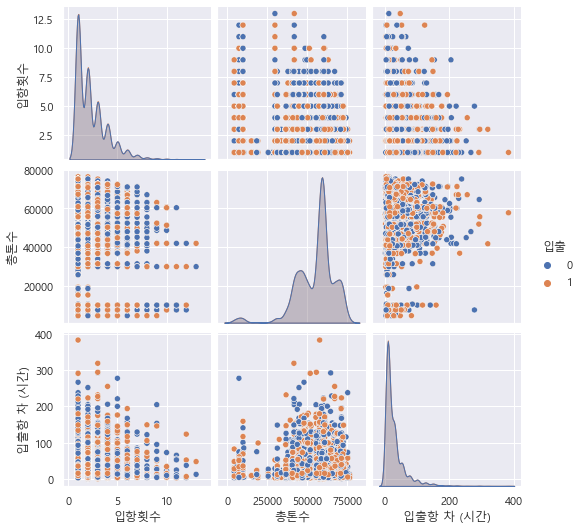

In [36]:
sns.pairplot(df, hue = '입출')

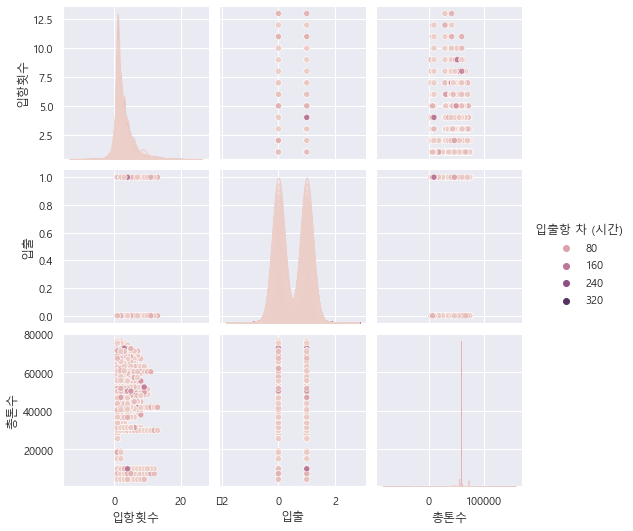

In [37]:
sns.pairplot(df, hue = '입출항 차 (시간)')

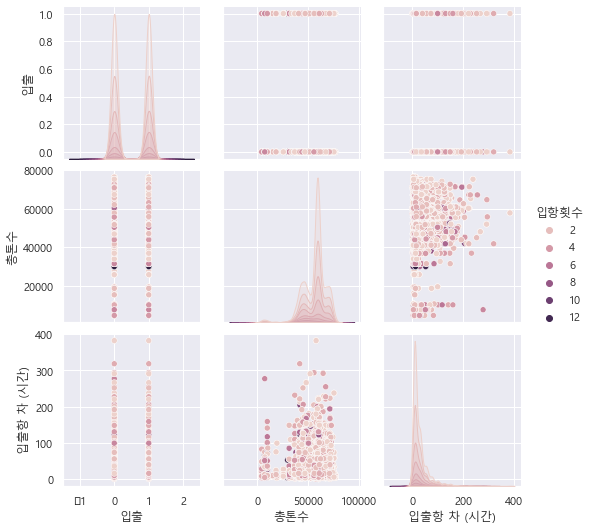

In [48]:
sns.pairplot(df, hue = '입항횟수')

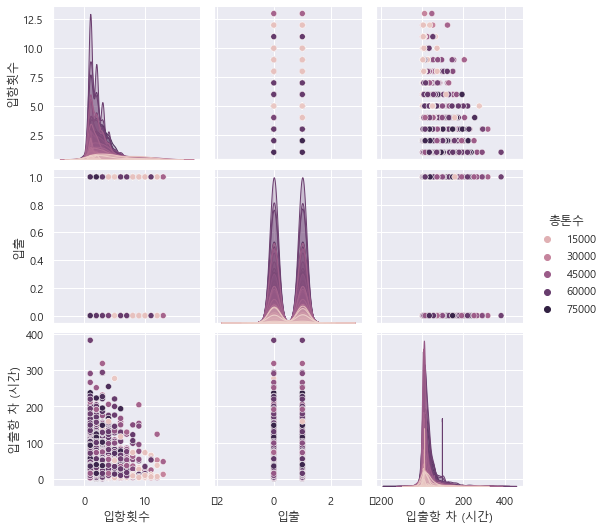

In [49]:
sns.pairplot(df, hue = '총톤수')

In [ ]:
df[]

In [41]:
facet = sns.FacetGrid(data=df, col='계선장소', row = '총톤수')
facet.map(sns.countplot, '입출항 차 (시간)')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001B4CB7B7670> (for post_execute):


KeyboardInterrupt: 

In [ ]:
p = sns.boxplot('작업시간(시간)',data = data_car) : 멋진 박스플롯
p = sns.boxplot('작업시간(시간)',data = data_car) : 그냥 박스플롯
p = sns.barplot(x='계선장소', y='작업시간(시간)',data = data_car) : bar플롯
sns.displot(
    data_car, x="작업시간(시간)", col="차항지", row="계선장소",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True)) : 여러변수 한꺼번에 barplot
p = sns.lineplot(x='승무원 1', y='작업시간(시간)',data = data_car) : line플롯